## 1.机器学习demo

### 准备摄氏度与华氏度的数据，然后通过matplotlib库绘制图像。

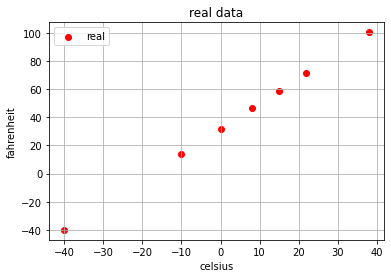

In [1]:
import numpy as np
import matplotlib.pyplot as plt
celsius    = [[-40], [-10], [ 0], [ 8], [15], [22], [ 38]]
fahrenheit = [[-40], [ 14], [32], [46.4], [59], [71.6], [100.4]]
plt.scatter(celsius,fahrenheit, c='red', label='real')
plt.xlabel('celsius')
plt.ylabel('fahrenheit')
plt.legend()
plt.grid(True)
plt.title('real data')
plt.show()

### 训练数据。LinearRegression是scikit-learn包下的线性回归方法，是普通的最小二乘线性回归。而fit就是拟合的意思，以此来训练模型。

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(celsius,fahrenheit)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 接下来我们调用lr.predict(celsius_test)方法来进行预测，以此来检验我们的模型准确度。我们通过下方图像中黄色的点可以看出，我们的模型非常准确。

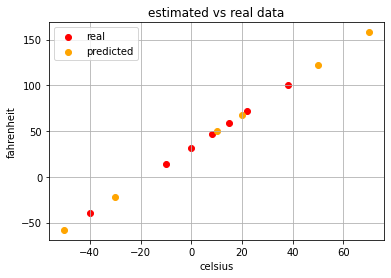

In [3]:
celsius_test = [[-50],[-30],[10],[20],[50],[70]]
fahrenheit_test = lr.predict(celsius_test)
plt.scatter(celsius,fahrenheit, c='red', label='real')
plt.scatter(celsius_test,fahrenheit_test, c='orange', label='predicted')
plt.xlabel('celsius')
plt.ylabel('fahrenheit')
plt.legend()
plt.grid(True)
plt.title('estimated vs real data')
plt.show()

## 2.深度学习demo

#### 我们使用TensorFlow内置的Keras方法创建了1层的神经网络，选择了MSE损失函数以及Adam优化器，训练了500代。
##### 如下图可以看到，随着代(epoch)数量的增加，损失函数的结果逐渐降低。

Finished training the model


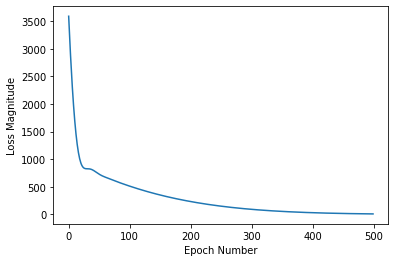

In [5]:
import tensorflow as tf
import numpy as np

# prepare data
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46.4, 59, 71.6, 100.4],  dtype=float)

# fit model
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

# print loss
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])